# Лабораторная работа №1
## ----------------------------------------------------------------------------------------------------------------------------------
## Задание:
1. Найти набор данных (датасет) для классификации удовлетворяющий следующим условиям: более 10 000 строк, более 20 столбцов, разные типы в столбцах, обязательно наличие целевого признака (таргета).
2. Провести классификацию найденного датасета, методом к- ближайших соседей. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

## Решение:
#### Подключаем библеотеки


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

#### Загружаю данные и вывоу датасет


In [13]:
Dataset = pd.read_csv('cybersecurity_attacks.csv')  # Замени на путь к файлу
print(Dataset.head())

             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \
0  Qui natus

### Создаём искомый столбец 

In [14]:
label_encoder = LabelEncoder()
Dataset['Attack Type Encoded'] = label_encoder.fit_transform(Dataset['Attack Type'])
print(Dataset[['Attack Type', 'Attack Type Encoded']].head())

  Attack Type  Attack Type Encoded
0     Malware                    2
1     Malware                    2
2        DDoS                    0
3     Malware                    2
4        DDoS                    0


#### Удоляем не числовые столбцы

In [15]:
non_numeric_columns = Dataset.select_dtypes(exclude=['number']).columns.tolist()
Dataset = Dataset.drop(columns=non_numeric_columns)
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Source Port          40000 non-null  int64  
 1   Destination Port     40000 non-null  int64  
 2   Packet Length        40000 non-null  int64  
 3   Anomaly Scores       40000 non-null  float64
 4   Attack Type Encoded  40000 non-null  int32  
dtypes: float64(1), int32(1), int64(3)
memory usage: 1.4 MB


#### Разделяем данные на признаки и целевую функцию, создаю модель к-ближайших соседей , обучаю модель, делаю предсказание на тестовой наборе, оцениваю качество модели. 

In [16]:
X = Dataset.drop(['Attack Type Encoded'], axis=1)
y = Dataset['Attack Type Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели k-ближайших соседей: {accuracy:.2f}')

Точность модели k-ближайших соседей: 0.34


#### График точности для разного колличества соседей

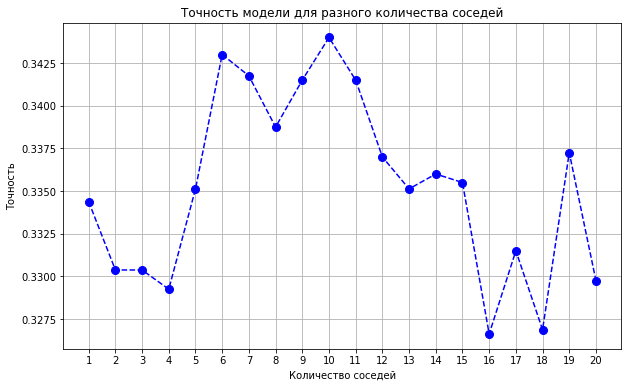

In [17]:
accuracies = []
neighbors = range(1, 21)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracies, marker='o', linestyle='dashed', color='blue', markersize=8)
plt.title('Точность модели для разного количества соседей')
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

#### Выбор гиперпараметров в модели машинного обучения, такой как количество соседей (в случае метода k-ближайших соседей), часто осуществляется путем применения техник перекрестной проверки (cross-validation). Перекрестная проверка помогает оценить, как хорошо модель обобщает данные, и избежать переобучения или недообучения.

#### Оптимальное количество соседей можно выбрать путем использования перекрестной проверки для разных значений этого гиперпараметра и выбора того, которое демонстрирует наилучшую производительность на тестовом наборе данных.